1. 1. Import Libraries

In [65]:
import numpy as np;
import matplotlib.pyplot as plt
import pandas as pd;
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

2. Creating Dataframe 

In [66]:
adult_data=pd.read_csv('/content/drive/MyDrive/Projects/Data Science/Classification Model_salaries/adult.csv')

In [67]:
adult_data.head

<bound method NDFrame.head of        39          State-gov   77516    Bachelors   13        Never-married  \
0      50   Self-emp-not-inc   83311    Bachelors   13   Married-civ-spouse   
1      38            Private  215646      HS-grad    9             Divorced   
2      53            Private  234721         11th    7   Married-civ-spouse   
3      28            Private  338409    Bachelors   13   Married-civ-spouse   
4      37            Private  284582      Masters   14   Married-civ-spouse   
...    ..                ...     ...          ...  ...                  ...   
32555  27            Private  257302   Assoc-acdm   12   Married-civ-spouse   
32556  40            Private  154374      HS-grad    9   Married-civ-spouse   
32557  58            Private  151910      HS-grad    9              Widowed   
32558  22            Private  201490      HS-grad    9        Never-married   
32559  52       Self-emp-inc  287927      HS-grad    9   Married-civ-spouse   

             Adm-cler

In [68]:
adult_data.shape

(32560, 15)

In [69]:
adult_data.describe

<bound method NDFrame.describe of        39          State-gov   77516    Bachelors   13        Never-married  \
0      50   Self-emp-not-inc   83311    Bachelors   13   Married-civ-spouse   
1      38            Private  215646      HS-grad    9             Divorced   
2      53            Private  234721         11th    7   Married-civ-spouse   
3      28            Private  338409    Bachelors   13   Married-civ-spouse   
4      37            Private  284582      Masters   14   Married-civ-spouse   
...    ..                ...     ...          ...  ...                  ...   
32555  27            Private  257302   Assoc-acdm   12   Married-civ-spouse   
32556  40            Private  154374      HS-grad    9   Married-civ-spouse   
32557  58            Private  151910      HS-grad    9              Widowed   
32558  22            Private  201490      HS-grad    9        Never-married   
32559  52       Self-emp-inc  287927      HS-grad    9   Married-civ-spouse   

             Adm-

In [70]:
adult_data.info

<bound method DataFrame.info of        39          State-gov   77516    Bachelors   13        Never-married  \
0      50   Self-emp-not-inc   83311    Bachelors   13   Married-civ-spouse   
1      38            Private  215646      HS-grad    9             Divorced   
2      53            Private  234721         11th    7   Married-civ-spouse   
3      28            Private  338409    Bachelors   13   Married-civ-spouse   
4      37            Private  284582      Masters   14   Married-civ-spouse   
...    ..                ...     ...          ...  ...                  ...   
32555  27            Private  257302   Assoc-acdm   12   Married-civ-spouse   
32556  40            Private  154374      HS-grad    9   Married-civ-spouse   
32557  58            Private  151910      HS-grad    9              Widowed   
32558  22            Private  201490      HS-grad    9        Never-married   
32559  52       Self-emp-inc  287927      HS-grad    9   Married-civ-spouse   

             Adm-cl

3. Rename the columns and handle null values (if any)


In [71]:
adult_data.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
                      'marital_status', 'occupation', 'relationship', 'race', 'sex',
                      'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
adult_data = adult_data.dropna() # Drop all null values

In [72]:
adult_data = adult_data.replace(' ?', np.nan) # Replace all '?' with null values

4. Dropping Education- Education No. is enough, Final Weight- Highly Discrete Data so not useful

In [73]:
adult_data = adult_data.drop(['education', 'fnlwgt'], axis = 1)
adult_data.head(1)

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [ ]:
5. Label Encoding

In [74]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
adult_data['workclass'] = le.fit_transform(adult_data['workclass'])
adult_data['marital_status'] = le.fit_transform(adult_data['marital_status'])
adult_data['occupation'] = le.fit_transform(adult_data['occupation'])
adult_data['relationship'] = le.fit_transform(adult_data['relationship'])
adult_data['race'] = le.fit_transform(adult_data['race'])
adult_data['sex'] = le.fit_transform(adult_data['sex'])
adult_data['native_country'] = le.fit_transform(adult_data['native_country'])
adult_data['income'] = le.fit_transform(adult_data['income'])

adult_data.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,5,13,2,3,0,4,1,0,0,13,38,0
1,38,3,9,0,5,1,4,1,0,0,40,38,0
2,53,3,7,2,5,0,2,1,0,0,40,38,0
3,28,3,13,2,9,5,2,0,0,0,40,4,0
4,37,3,14,2,3,5,4,0,0,0,40,38,0


<Axes: xlabel='income', ylabel='age'>

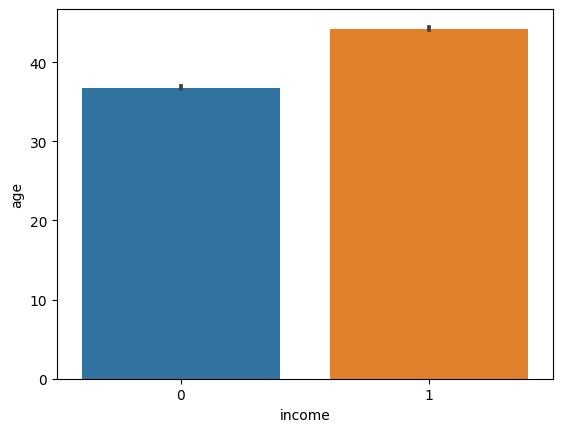

In [75]:
sns.barplot(x = 'income', y = 'age', data = adult_data)

<Axes: >

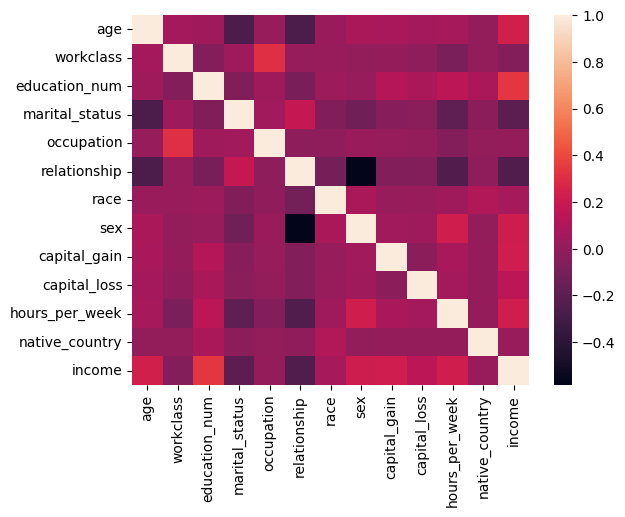

In [76]:
sns.heatmap(adult_data.corr())

6. Train Test Split

In [77]:
X = adult_data.iloc[:, :-1] # Features
y = adult_data.iloc[:, -1] # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

7. Apply the following models on the training dataset and generate the predicted value for the test dataset

In [78]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)



In [79]:
# Logistic Regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [80]:
# Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

In [81]:
# KNN Classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

8. Predict the income for test data

In [82]:
test_data = pd.concat([X_test, y_test], axis=1) # Combine features and target variable
test_data['income_predicted_dt'] = y_pred_dt # Add predicted values from Decision Tree
test_data['income_predicted_rfc'] = y_pred_rfc # Add predicted values from Random Forest
test_data['income_predicted_lr'] = y_pred_lr # Add predicted values from Logistic Regression
test_data['income_predicted_knn'] = y_pred_knn # Add predicted values from KNN Classifier



9. Compute Confusion matrix and classification report for each of these models and validate the result for Precision, Recall, F1-score and Accuracy for each model based on values

In [83]:
# Decision Tree
dt_cm = confusion_matrix(test_data['income'], test_data['income_predicted_dt'])
dt_cr = classification_report(test_data['income'], test_data['income_predicted_dt'])
print("Decision Tree:")
print("Accuracy:", dt_cm.diagonal().sum() / dt_cm.sum())
print(dt_cr)

# Random Forest Classifier
rfc_cm = confusion_matrix(test_data['income'], test_data['income_predicted_rfc'])
rfc_cr = classification_report(test_data['income'], test_data['income_predicted_rfc'])
print("Random Forest Classifier:")
print("Accuracy:", rfc_cm.diagonal().sum() / rfc_cm.sum())
print(rfc_cr)


# Logistic Regression
lr_cm = confusion_matrix(test_data['income'], test_data['income_predicted_lr'])
lr_cr = classification_report(test_data['income'], test_data['income_predicted_lr'])
print("Logistic Regression:")
print("Accuracy:", lr_cm.diagonal().sum() / lr_cm.sum())
print(lr_cr)

# KNN Classifier
knn_cm = confusion_matrix(test_data['income'], test_data['income_predicted_knn'])
knn_cr = classification_report(test_data['income'], test_data['income_predicted_knn'])
print("KNN Classifier:")
print("Accuracy:", knn_cm.diagonal().sum() / knn_cm.sum())
print(knn_cr)




Decision Tree:
Accuracy: 0.812960687960688
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      4912
           1       0.62      0.61      0.62      1600

    accuracy                           0.81      6512
   macro avg       0.75      0.75      0.75      6512
weighted avg       0.81      0.81      0.81      6512

Random Forest Classifier:
Accuracy: 0.8542690417690417
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      4912
           1       0.73      0.64      0.68      1600

    accuracy                           0.85      6512
   macro avg       0.81      0.78      0.79      6512
weighted avg       0.85      0.85      0.85      6512

Logistic Regression:
Accuracy: 0.8072788697788698
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      4912
           1       0.68      0.40      0.51      1600

    accuracy                      

Generate the percentage of misclassification in each of these models.

In [84]:
# Decision Tree
dt_misclassification = (1 - dt_cm.diagonal().sum() / dt_cm.sum()) * 100
print("Decision Tree - Percentage of Misclassification:", dt_misclassification)

# Random Forest Classifier
rfc_misclassification = (1 - rfc_cm.diagonal().sum() / rfc_cm.sum()) * 100
print("Random Forest Classifier - Percentage of Misclassification:", rfc_misclassification)

# Logistic Regression
lr_misclassification = (1 - lr_cm.diagonal().sum() / lr_cm.sum()) * 100
print("Logistic Regression - Percentage of Misclassification:", lr_misclassification)

# KNN Classifier
knn_misclassification = (1 - knn_cm.diagonal().sum() / knn_cm.sum()) * 100
print("KNN Classifier - Percentage of Misclassification:", knn_misclassification)



Decision Tree - Percentage of Misclassification: 18.7039312039312
Random Forest Classifier - Percentage of Misclassification: 14.573095823095827
Logistic Regression - Percentage of Misclassification: 19.272113022113025
KNN Classifier - Percentage of Misclassification: 15.494471744471749


From the above output, we can see that the Random Forest Classifier has the lowest percentage of misclassification at 14.57%

10 Report the model with the best accuracy.

Based on the accuracy scores and misclassification percentages obtained from the above analysis, the Random Forest Classifier is the model with the best accuracy, with an accuracy score of 85.42% and a misclassification percentage of 14.57. Therefore, the Random Forest Classifier is the recommended model for predicting the income of a person.